### Import libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import folium
from folium import Circle
from geopy import Nominatim

from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

In [2]:
df =pd.read_csv("../input/cost-of-living/cost-of-living.csv")

In [3]:
df.head()

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.0,3.38,3.58,5.27,...,3.75,5.72,3.82,15.0,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.0,17.48,22.99,23.73,...,18.76,22.01,11.47,60.0,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.0,4.51,3.58,4.22,...,3.56,3.67,3.06,8.2,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.0,1.69,1.02,0.84,...,1.50,1.10,2.37,4.0,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.0,2.82,1.53,2.11,...,1.50,2.20,3.06,4.0,7.26,5.57,5.59,4.97,2.81,2.70


In [4]:
df.sample(5)

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
23,Apartment (3 bedrooms) in City Centre,1012.53,545.50,353.76,1819.32,428.67,2311.84,352.74,398.18,608.91,...,589.43,635.89,315.38,1432.14,1577.52,2027.71,1474.61,2674.32,285.82,680.28
31,1 Pair of Jeans (Levis 501 Or Similar),71.86,36.15,33.20,83.41,56.54,86.65,42.38,63.44,43.59,...,59.94,65.73,29.38,72.59,81.25,61.86,57.64,61.22,32.34,56.57
24,Apartment (3 bedrooms) Outside of Centre,615.19,314.98,225.34,1271.16,330.84,1428.30,229.29,259.32,299.45,...,414.33,406.41,203.48,1116.71,1213.39,1341.31,982.76,1810.32,169.03,447.51
52,Toyota Corolla 1.6l 97kW Comfort (Or Equivalen...,19305.29,20874.72,20898.83,24402.77,17238.13,23233.33,21020.29,16529.98,18564.59,...,20334.03,18129.31,20892.07,21788.33,34921.49,15221.84,15239.20,15066.62,23071.86,25324.92
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.00,4.51,3.58,4.22,...,3.56,3.67,3.06,8.20,12.97,7.12,7.32,7.15,3.38,5.39


In [5]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Saint Petersburg, Russia")

In [6]:
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Latitude = 59.938732, Longitude = 30.316229


In [7]:
df = df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
Unnamed: 0,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three...",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red M...,Toyota Corolla 1.6l 97kW Comfort (Or Equivalen...,"Preschool (or Kindergarten), Full Day, Private...","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41
"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0


In [8]:
df.rename(columns=df.iloc[0], inplace = True)
df.drop(df.index[0], inplace = True)
df.head()

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41
"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.3


In [9]:
df = df.reset_index()

# lets rename the index column to location
df = df.rename(columns={'index': 'Location'})
df.head()

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.72,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.83,212.18,4948.41
3,"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.6,1641.0
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.3


In [10]:
# lets check the column names
df.columns

Index(['Location', 'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Cen

In [11]:
import warnings
warnings.filterwarnings('ignore')

# It can be time consuming
from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

# 2- - create location column
df['location'] = df['Location'].apply(geocode)

# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

# 4 - split point column into latitude, longitude and altitude columns
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)

# lets check the head of the data set
df.head()

,Location,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",location,point,latitude,longitude,altitude
0,"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,...,0.48,7.18,19305.29,411.83,5388.86,"(Санкт-Петербург, Северо-Западный федеральный ...","(59.938732, 30.316229, 0.0)",59.938732,30.316229,0.0
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,...,0.62,9.73,20874.72,282.94,6905.43,"(İstanbul, Fatih, İstanbul, Marmara Bölgesi, 3...","(41.0091982, 28.9662187, 0.0)",41.009198,28.966219,0.0
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,...,0.58,8.61,20898.83,212.18,4948.41,"(İzmir, Konak, İzmir, Ege Bölgesi, 00000, Türk...","(38.4224548, 27.1310699, 0.0)",38.422455,27.131070,0.0
3,"Helsinki, Finland",12.0,65.0,8.0,6.5,6.75,2.66,1.89,0.96,2.27,...,1.25,12.34,24402.77,351.6,1641.0,"(Helsinki, Helsingin seutukunta, Uusimaa, Etel...","(60.1674881, 24.9427473, 0.0)",60.167488,24.942747,0.0
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,...,0.59,5.37,17238.13,210.52,2679.3,"(Chișinău, Municipiul Chișinău, Moldova, (47.0...","(47.0245117, 28.8322923, 0.0)",47.024512,28.832292,0.0


In [12]:
# lets remove some unnecessary columns from the data
df = df.drop(['location','point','altitude'], axis = 1)

# lets check the column names again
df.columns

Index(['Location', 'Meal, Inexpensive Restaurant',
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'One-way Ticket (Local Transport)',
       'Chicken Breasts (Boneless, Skinless), (1kg)',
       'Monthly Pass (Regular Price)', 'Gasoline (1 liter)', 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Cen

In [13]:
def food(df):
    return int(round((df[['Meal, Inexpensive Restaurant',
       'Domestic Beer (0.5 liter draught)',
       'Imported Beer (0.33 liter bottle)', 'Coke/Pepsi (0.33 liter bottle)',
       'Water (0.33 liter bottle) ', 'Milk (regular), (1 liter)',
       'Loaf of Fresh White Bread (500g)', 'Eggs (regular) (12)',
       'Local Cheese (1kg)', 'Water (1.5 liter bottle)',
       'Bottle of Wine (Mid-Range)', 'Domestic Beer (0.5 liter bottle)',
       'Imported Beer (0.33 liter bottle)', 'Cigarettes 20 Pack (Marlboro)',
       'Chicken Breasts (Boneless, Skinless), (1kg)', 'Apples (1kg)', 'Oranges (1kg)',
       'Potato (1kg)', 'Lettuce (1 head)', 'Cappuccino (regular)',
       'Rice (white), (1kg)', 'Tomato (1kg)', 'Banana (1kg)', 'Onion (1kg)',
       'Beef Round (1kg) (or Equivalent Back Leg Red Meat)',]].mean()).mean()))

def travel(df):
    return int(round((df[['One-way Ticket (Local Transport)',
                            'Monthly Pass (Regular Price)', 'Gasoline (1 liter)',
                           'Taxi Start (Normal Tariff)', 'Taxi 1km (Normal Tariff)',
                           'Taxi 1hour Waiting (Normal Tariff)',]].mean()).mean()))

def living(df):
    return int(round((df[[ 'Volkswagen Golf',
       'Apartment (1 bedroom) in City Centre',
       'Apartment (1 bedroom) Outside of Centre',
       'Apartment (3 bedrooms) in City Centre',
       'Apartment (3 bedrooms) Outside of Centre',
       'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment',
         'Price per Square Meter to Buy Apartment in City Centre',
       'Price per Square Meter to Buy Apartment Outside of Centre',
        'Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car)',]].mean()).mean()))

def lifestyle(df):
    return int(round((df[['1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans)',
       'Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)',
       'Fitness Club, Monthly Fee for 1 Adult',
       'Tennis Court Rent (1 Hour on Weekend)',
       'Cinema, International Release, 1 Seat',
       '1 Pair of Jeans (Levis 501 Or Similar)',
       '1 Summer Dress in a Chain Store (Zara, H&M, ...)',
       '1 Pair of Nike Running Shoes (Mid-Range)',
       '1 Pair of Men Leather Business Shoes', 
       'Meal for 2 People, Mid-range Restaurant, Three-course',
       'McMeal at McDonalds (or Equivalent Combo Meal)',]].mean()).mean()))

def education(df):
    return int(round((df[['Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child',
       'International Primary School, Yearly for 1 Child',]].mean()).mean()))

def income(df):
    return int(round((df[['Average Monthly Net Salary (After Tax)',
       'Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate',]].mean()).mean()))

In [14]:
df['Food'] = df.apply(food, axis = 1)
df['Travel'] = df.apply(travel, axis = 1)
df['Living'] = df.apply(living, axis = 1)
df['Lifestyle'] = df.apply(lifestyle, axis = 1)
df['Education'] = df.apply(education, axis = 1)
df['Income'] = df.apply(income, axis = 1)

In [15]:
# lets split the location to fetch the country names
df['Location'].str.split(', ')[0]

['Saint Petersburg', 'Russia']

In [16]:
# lets apply the same function on whole dataset
df['country'] = df['Location'].str.split(', ')

# lets store the second one in the country column
df['Country'] = df['country'].apply(lambda x: x[1])

#lets check the values in the country column
df['Country'].value_counts()

India        11
Canada        8
Poland        6
Australia     5
Romania       5
             ..
Denmark       1
Slovenia      1
Sri Lanka     1
AZ            1
Ecuador       1
Name: Country, Length: 90, dtype: int64

In [17]:
## lets groupby the Countries with Lifestyle Factors

df[['Country','Food','Travel',
      'Living','Lifestyle','Education','Income']].groupby(['Country']).agg('mean').style.background_gradient(cmap = 'Wistia')

,Food,Travel,Living,Lifestyle,Education,Income
Country,,,,,,
AZ,4.000000,16.000000,5114.000000,35.000000,7088.000000,1559.000000
Albania,2.000000,5.000000,4157.000000,29.000000,1225.000000,171.000000
Argentina,2.000000,3.000000,4346.000000,28.000000,1638.000000,266.000000
Armenia,2.000000,3.000000,4390.000000,30.000000,1581.000000,154.000000
Australia,4.400000,21.600000,4932.200000,38.600000,5919.400000,1400.800000
Austria,4.000000,14.000000,6662.000000,40.000000,8124.000000,951.000000
Azerbaijan,2.000000,2.000000,4164.000000,32.000000,2933.000000,151.000000
Belarus,2.000000,3.000000,3932.000000,33.000000,2874.000000,224.000000
Belgium,4.000000,15.000000,5773.000000,42.000000,9519.000000,1146.000000


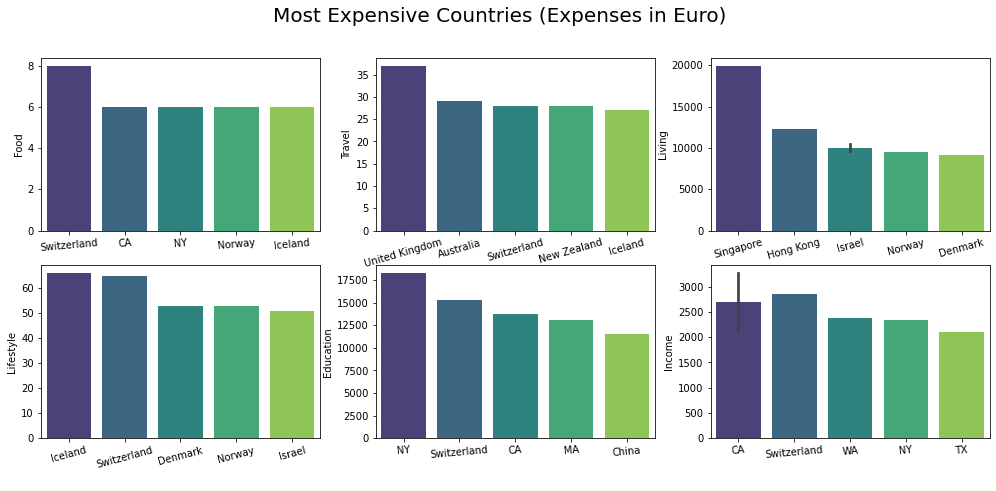

In [18]:
# Let's check out the Top 5 Most Expensive Countries for Food
plt.rcParams['figure.figsize'] = (17, 7)

plt.subplot(2, 3, 1)
x = df[['Country','Food']].sort_values(by = 'Food', ascending = False).head(5)
sns.barplot(x['Country'], x['Food'], palette = 'viridis')
plt.xticks(rotation = 5)
plt.xlabel(' ')

plt.subplot(2, 3, 2)
x = df[['Country','Travel']].sort_values(by = 'Travel', ascending = False).head(5)
sns.barplot(x['Country'], x['Travel'], palette = 'viridis')
plt.xticks(rotation = 16)
plt.xlabel(' ')

plt.subplot(2, 3, 3)
x = df[['Country','Living']].sort_values(by = 'Living', ascending = False).head(6)
sns.barplot(x['Country'], x['Living'], palette = 'viridis')
plt.xticks(rotation = 15)
plt.xlabel(' ')

plt.subplot(2, 3, 4)
x = df[['Country','Lifestyle']].sort_values(by = 'Lifestyle', ascending = False).head(5)
sns.barplot(x['Country'], x['Lifestyle'], palette = 'viridis')
plt.xticks(rotation = 15)
plt.xlabel(' ')

plt.subplot(2, 3, 5)
x = df[['Country','Education']].sort_values(by = 'Education', ascending = False).head(5)
sns.barplot(x['Country'], x['Education'], palette = 'viridis')
plt.xticks(rotation = 5)
plt.xlabel(' ')

plt.subplot(2, 3, 6)
x = df[['Country','Income']].sort_values(by = 'Income', ascending = False).head(6)
sns.barplot(x['Country'], x['Income'], palette = 'viridis')
plt.xticks(rotation = 5)
plt.xlabel(' ')

plt.suptitle('Most Expensive Countries (Expenses in Euro)', fontsize = 20)
plt.show()

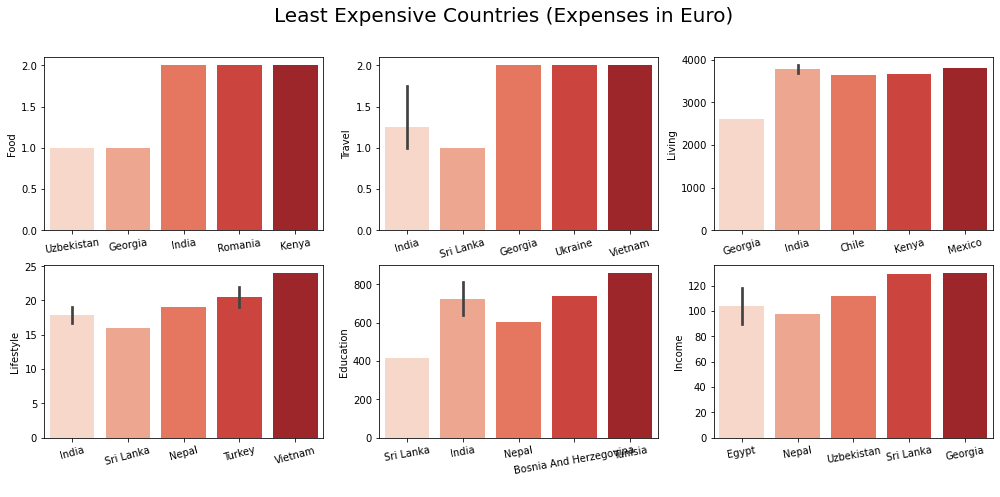

In [19]:
# Let's check out the Top 5 Least Expensive Countries
plt.rcParams['figure.figsize'] = (17, 7)

plt.subplot(2, 3, 1)
x = df[['Country','Food']].sort_values(by = 'Food', ascending = True).head(5)
sns.barplot(x['Country'], x['Food'], palette = 'Reds')
plt.xticks(rotation = 8)
plt.xlabel(' ')

plt.subplot(2, 3, 2)
x = df[['Country','Travel']].sort_values(by = 'Travel', ascending = True).head(9)
sns.barplot(x['Country'], x['Travel'], palette = 'Reds')
plt.xticks(rotation = 16)
plt.xlabel(' ')

plt.subplot(2, 3, 3)
x = df[['Country','Living']].sort_values(by = 'Living', ascending = True).head(9)
sns.barplot(x['Country'], x['Living'], palette = 'Reds')
plt.xticks(rotation = 15)
plt.xlabel(' ')

plt.subplot(2, 3, 4)
x = df[['Country','Lifestyle']].sort_values(by = 'Lifestyle', ascending = True).head(18)
sns.barplot(x['Country'], x['Lifestyle'], palette = 'Reds')
plt.xticks(rotation = 15)
plt.xlabel(' ')

plt.subplot(2, 3, 5)
x = df[['Country','Education']].sort_values(by = 'Education', ascending = True).head(9)
sns.barplot(x['Country'], x['Education'], palette = 'Reds')
plt.xticks(rotation = 10)
plt.xlabel(' ')

plt.subplot(2, 3, 6)
x = df[['Country','Income']].sort_values(by = 'Income', ascending = True).head(6)
sns.barplot(x['Country'], x['Income'], palette = 'Reds')
plt.xticks(rotation = 10)
plt.xlabel(' ')

plt.suptitle('Least Expensive Countries (Expenses in Euro)', fontsize = 20)
plt.show()

In [20]:
# To find some interesting columns to plot I've sorted them by range. 
# Perhaps a better way to do this in future would be by variance.
top_range = (df.describe().loc['min',:]/df.describe().loc['max',:]).sort_values().index[2:22]
list(top_range)


['Education', 'Travel', 'Income', 'Food', 'Living', 'Lifestyle']

In [21]:
def color_producer(val):
    if val <= df[item].quantile(.25):
        return 'forestgreen'
    elif val <= df[item].quantile(.50):
        return 'goldenrod'
    elif val <= df[item].quantile(.75):
        return 'darkred'
    else:
        return 'red'

In [22]:
map = folium.Map(location=[df['latitude'].mean(),
                           df['longitude'].mean()],
                 tiles='Stamen Terrain',
                 zoom_start=2)

item = top_range[0]

# Add a bubble map to the base map
for i in range(0,len(df)):
    Circle(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(df.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Education


In [23]:
map = folium.Map(location=[df['latitude'].mean(),
                           df['longitude'].mean()],
                 tiles='CartoDB dark_matter',
                 zoom_start=2)

item = top_range[1]

# Add a bubble map to the base map
for i in range(0,len(df)):
    Circle(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(df.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Travel


In [24]:
map = folium.Map(location=[df['latitude'].mean(),
                           df['longitude'].mean()],
                 tiles='Stamen Toner',
                 zoom_start=2)

item = top_range[2]

# Add a bubble map to the base map
for i in range(0,len(df)):
    Circle(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(df.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Income


In [25]:
map = folium.Map(location=[df['latitude'].mean(),
                           df['longitude'].mean()],
                 tiles='Stamen Watercolor',
                 zoom_start=2)

item = top_range[3]

# Add a bubble map to the base map
for i in range(0,len(df)):
    Circle(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(df.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Food


In [26]:
map = folium.Map(location=[df['latitude'].mean(),
                           df['longitude'].mean()],
                 tiles='Open Street Map',
                 zoom_start=2)

item = top_range[4]

# Add a bubble map to the base map
for i in range(0,len(df)):
    Circle(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(df.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Living


In [27]:
map = folium.Map(location=[df['latitude'].mean(),
                           df['longitude'].mean()],
                 tiles='CartoDB Positron',
                 zoom_start=2)

item = top_range[5]

# Add a bubble map to the base map
for i in range(0,len(df)):
    Circle(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        radius=120000,
        color=color_producer(df.iloc[i][item])).add_to(map)

print ('Price of: ', item)
map

Price of:  Lifestyle


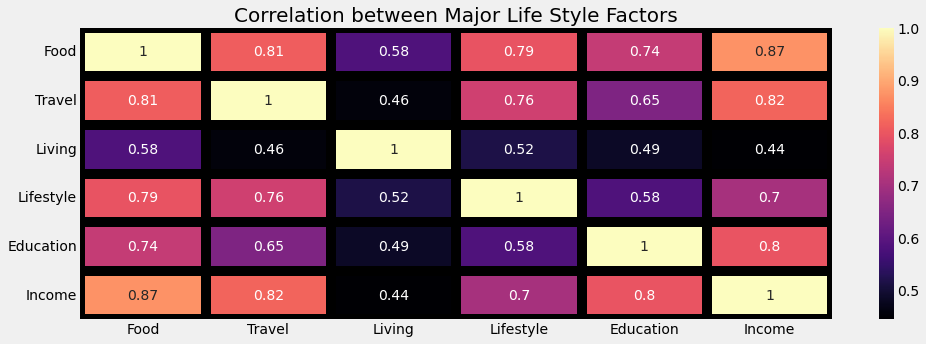

In [28]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.heatmap(df[['Food','Travel','Living','Lifestyle','Education','Income']].corr(),
            cmap = 'magma', 
            annot = True, linecolor='black', linewidths = 10)
plt.title('Correlation between Major Life Style Factors', fontsize = 20)
plt.show()

### Comparing Some of the Most Popular Countries in the World

In [29]:
df[(df['Country'] == 'United Kingdom') | (df['Country'] == 'Australia') | 
     (df['Country'] == 'Germany') | (df['Country'] == 'China') | 
    (df['Country'] == 'Russia')][['Location','Food', 
                'Travel','Living','Lifestyle','Education',
                    'Income']].set_index('Location').sort_values(by = 'Income',
                                ascending = False).style.background_gradient(cmap = 'copper')

,Food,Travel,Living,Lifestyle,Education,Income
Location,,,,,,
"Brisbane, Australia",5,22,4644,39,4910,1517
"Sydney, Australia",5,29,5781,42,6661,1511
"Melbourne, Australia",4,21,5218,39,7062,1398
"London, United Kingdom",4,37,9069,42,11423,1380
"Adelaide, Australia",4,16,4309,34,4606,1329
"Munich, Germany",4,17,7445,44,5867,1315
"Frankfurt, Germany",3,22,6871,42,6502,1310
"Hamburg, Germany",3,21,5940,44,7085,1267
"Perth, Australia",4,20,4709,39,6358,1249
